<a href="https://colab.research.google.com/github/SiddanshChawla/ChatIn-Web/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
def data(ticker):
  end_date = '2023-04-01'
  data = yf.download(ticker, end=end_date)
  return pd.DataFrame(data)

In [ ]:
df = data('RELIANCE.NS')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-24,2245.25,2250.000000,2198.000000,2203.300049,2203.300049,5711497
2023-03-27,2217.50,2254.000000,2200.199951,2237.550049,2237.550049,6486068
2023-03-28,2245.00,2256.500000,2237.000000,2248.000000,2248.000000,5804018
2023-03-29,2239.00,2244.800049,2211.100098,2234.699951,2234.699951,8678073
2023-03-31,2255.00,2343.449951,2254.699951,2331.050049,2331.050049,13001005


In [ ]:
df.dropna(inplace=True)

In [ ]:
def calculate_rsi(prices, n=14):
    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed >= 0].sum()/n
    down = -seed[seed < 0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1.+rs)
    for i in range(n, len(prices)):
        delta = deltas[i-1]
        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta
        up = (up*(n-1) + upval)/n
        down = (down*(n-1) + downval)/n
        if down == 0:
            rs = 100  # Special case when down is zero
        else:
            rs = up/down
        if np.isinf(rs):
            rs = 100  # Special case when RS is infinity
        rsi[i] = 100. - 100./(1.+rs)
    return rsi

In [ ]:
close_prices = df['Close'].values

rsi_values = calculate_rsi(close_prices)

df['RSI'] = rsi_values

In [ ]:
def calculate_sma(prices, n=20):
    sma = np.zeros_like(prices)
    for i in range(n, len(prices)):
        sma[i] = prices[i-n:i].mean()
    return sma

In [ ]:
close_prices = df['Close'].values
sma_values = calculate_sma(close_prices)
df['SMA'] = sma_values

In [ ]:
import matplotlib.pyplot as plt

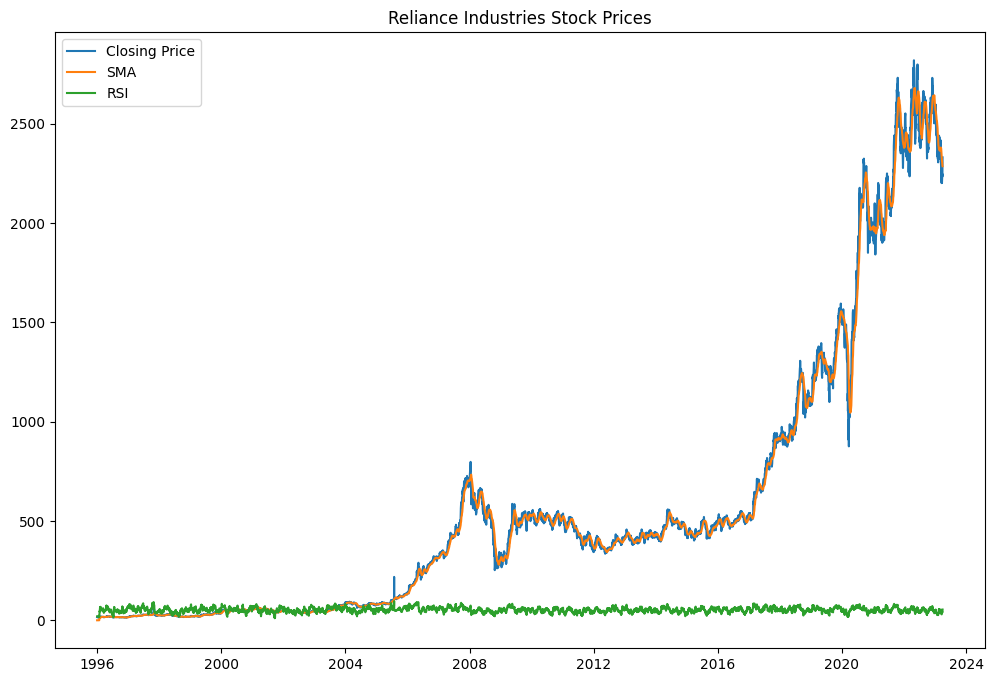

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df['Close'], label='Closing Price')
ax.plot(df['SMA'], label='SMA')
ax.plot(df['RSI'], label='RSI')
ax.set_title('Reliance Industries Stock Prices')
ax.legend()

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA
Date,,,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.477991,48051995,19.775083,0.0
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396508,77875009,19.775083,0.0
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475444,96602936,19.775083,0.0
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378685,100099436,19.775083,0.0
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307388,76935930,19.775083,0.0


In [ ]:
df = df[{'Close', 'Volume', 'RSI', 'SMA', 'Open'}]

<ipython-input-33-31e537b2b7e8>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df[{'Close', 'Volume', 'RSI', 'SMA', 'Open'}]


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head(50)

,Volume,RSI,Open,SMA,Close
Date,,,,,
1996-01-01,48051995,19.775083,15.859429,0.000000,15.917452
1996-01-02,77875009,19.775083,15.878770,0.000000,15.793671
1996-01-03,96602936,19.775083,16.052837,0.000000,15.913584
1996-01-04,100099436,19.775083,15.762726,0.000000,15.766594
1996-01-05,76935930,19.775083,15.704703,0.000000,15.658285
1996-01-08,86288584,19.775083,15.627340,0.000000,15.031645
1996-01-09,179415702,19.775083,14.586807,0.000000,14.598411
1996-01-10,127653926,19.775083,14.312168,0.000000,14.223200
1996-01-11,189051436,19.775083,14.080079,0.000000,14.668038


In [ ]:
df['Tomorrows_open'] = df['Open'].shift(-1)

In [ ]:
df.isna().sum()

Volume            0
RSI               0
Open              0
SMA               0
Close             0
Tomorrows_open    1
dtype: int64

In [ ]:
df.head()

,Volume,RSI,Open,SMA,Close,Tomorrows_open
Date,,,,,,
1996-01-01,48051995,19.775083,15.859429,0.0,15.917452,15.878770
1996-01-02,77875009,19.775083,15.878770,0.0,15.793671,16.052837
1996-01-03,96602936,19.775083,16.052837,0.0,15.913584,15.762726
1996-01-04,100099436,19.775083,15.762726,0.0,15.766594,15.704703
1996-01-05,76935930,19.775083,15.704703,0.0,15.658285,15.627340


In [ ]:
df.drop('Close', inplace=True)

In [ ]:
df.to_csv('reliance_clean.csv')

In [2]:
import pandas as pd

In [11]:
bse = pd.read_csv('bse_data.csv')
nifty = pd.read_csv('nse_data.csv')
reliance = pd.read_csv('reliance_clean.csv')

In [12]:
bse.head()

,Date,Close
0,1997-07-01,4300.859863
1,1997-07-02,4333.899902
2,1997-07-03,4323.459961
3,1997-07-04,4323.819824
4,1997-07-07,4291.450195


In [13]:
bse['BSE'] = bse['Close']

In [16]:
bse.drop('Close', inplace=True, axis = 1)

In [17]:
nifty['Nifty'] = nifty['Close']
nifty.drop('Close', inplace=True, axis = 1)
nifty.head()

,Date,Nifty
0,2007-09-17,4494.649902
1,2007-09-18,4546.200195
2,2007-09-19,4732.350098
3,2007-09-20,4747.549805
4,2007-09-21,4837.549805


In [19]:
reliance.drop('Tomorrows_open', inplace=True, axis=1)

In [20]:
reliance.head()

,Date,Volume,RSI,Open,SMA,Close
0,1996-01-01,48051995,19.775083,15.859429,0.0,15.917452
1,1996-01-02,77875009,19.775083,15.878770,0.0,15.793671
2,1996-01-03,96602936,19.775083,16.052837,0.0,15.913584
3,1996-01-04,100099436,19.775083,15.762726,0.0,15.766594
4,1996-01-05,76935930,19.775083,15.704703,0.0,15.658285


In [21]:
merged_df = pd.merge(reliance, bse, on='Date')
print(merged_df.head())

         Date     Volume        RSI       Open        SMA      Close  \
0  1997-07-01  204046316  71.333330  28.779062  25.891099  28.291676   
1  1997-07-02  162740433  73.040747  28.659149  26.132278  28.635941   
2  1997-07-03  104271323  68.222280  28.488951  26.389124  28.256863   
3  1997-07-04  143024955  62.512225  28.334225  26.599938  27.769474   
4  1997-07-07  126976600  63.248371  27.695980  26.796440  27.877783   

           BSE  
0  4300.859863  
1  4333.899902  
2  4323.459961  
3  4323.819824  
4  4291.450195  


In [22]:
df = pd.merge(merged_df, nifty, on='Date')
print(df.head())

         Date    Volume        RSI        Open         SMA       Close  \
0  2007-09-17   5833819  68.833050  502.734589  473.049094  502.313568   
1  2007-09-18  10152197  71.813843  500.258057  475.900812  509.681244   
2  2007-09-19  13357668  79.882539  528.738098  479.754285  538.371765   
3  2007-09-20  11010710  80.723787  538.891846  484.802681  542.433289   
4  2007-09-21  11665026  84.548691  540.873047  490.329047  564.759155   

            BSE        Nifty  
0  15504.429688  4494.649902  
1  15669.120117  4546.200195  
2  16322.750000  4732.350098  
3  16347.950195  4747.549805  
4  16564.230469  4837.549805  


In [23]:
df.to_csv('reliance_updated.csv')